## Final Assessment

### 3.1 Import Library

In [1]:
import time
start_time = time.time()

In [2]:
import os
import copy
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import seaborn as sn
import scipy.stats as sps
import matplotlib
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve

from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/zmy/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


### 3.2 Pulling Data

In [3]:
df = pd.read_csv(os.path.join('data','carbon_all.csv'), low_memory=False)

In [5]:
df.columns

Index(['pm25', 'co', 'dew', 'humidity', 'no2', 'o3', 'pm10', 'pressure', 'so2',
       'temperature', 'wind-gust', 'wind-speed', 'year_month', 'Date'],
      dtype='object')

In [6]:
df=df.rename(columns={"wind-gust":"wind_gust",
                        "wind-speed": "wind_speed",
                        })

In [7]:
df.describe()

,pm25,co,dew,humidity,no2,o3,pm10,pressure,so2,temperature,wind_gust,wind_speed
count,941.0000,938.0000,915.0000,921.0000,941.0000,941.0000,941.0000,921.0000,941.0000,921.0000,921.0000,921.0000
mean,39.0414,5.4584,7.1552,74.7582,13.3460,15.1880,15.7673,"1,014.6743",1.8313,12.1504,7.7782,3.4669
std,17.9325,3.1392,4.7279,11.3737,6.1711,6.9065,7.4123,11.2672,1.1886,5.4774,3.9754,1.8453
min,15.0000,0.2000,-9.0000,44.8000,2.7000,0.7000,5.0000,972.5000,0.2000,-1.6000,1.4000,0.8000
25%,26.0000,3.0000,4.0000,66.0000,8.7000,10.6000,11.0000,"1,007.8000",1.1000,8.3000,4.7000,2.1000
50%,33.0000,4.6000,7.0000,75.5000,11.9000,15.4000,14.0000,"1,015.5000",1.5000,11.4000,7.0000,3.0000
75%,46.0000,8.2000,11.0000,84.5000,16.7000,20.1000,18.0000,"1,022.5000",2.2000,16.6000,10.0000,4.3000
max,133.0000,15.2000,18.0000,95.0000,42.4000,38.8000,53.0000,"1,047.9000",8.2000,28.7000,28.6000,12.3000


In [8]:
df.head(5)

,pm25,co,dew,humidity,no2,o3,pm10,pressure,so2,temperature,wind_gust,wind_speed,year_month,Date
0,30,7.6000,4.5000,76.0000,12.0000,14.9000,11,"1,033.0000",0.9000,9.0000,6.2000,2.5000,Jan-19,01/01/2019
1,33,10.0000,1.0000,75.0000,16.5000,14.2000,14,"1,041.4000",0.6000,5.5000,5.1000,2.2000,Jan-19,02/01/2019
2,42,10.6000,1.0000,74.4000,21.3000,10.7000,15,"1,041.6000",0.7000,5.0000,2.9000,1.2000,Jan-19,03/01/2019
3,72,11.8000,1.0000,76.0000,25.2000,4.3000,28,"1,041.0000",1.3000,3.3000,3.1000,1.5000,Jan-19,04/01/2019
4,63,10.4000,1.0000,76.6000,20.6000,8.4000,22,"1,037.6000",1.1000,5.0000,5.6000,2.8000,Jan-19,05/01/2019


In [9]:
select= [x for x in ['pm25','so2','pressure',  'temperature', 'wind_gust', 'wind_speed','dew', 'humidity']]

#### 有缺失值，pm25缺失的话就去掉一整条记录，其余缺失值采用插值法（取前一个数）填充,结果显示pm25没有缺失，则只需要插补

In [10]:
df.isnull().any()

pm25           False
co              True
dew             True
humidity        True
no2            False
o3             False
pm10           False
pressure        True
so2            False
temperature     True
wind_gust       True
wind_speed      True
year_month     False
Date           False
dtype: bool

In [11]:
selection = [x for x in df.columns.values if x.startswith('date')]
select= [x for x in df.columns.values]

for c in select:
    if c not in selection:
        #df[c] = df[c].apply(lambda x: int(x))
        #df[c] = df[c].fillna(method='pad')
        df[c] = df[c].interpolate(method='linear', limit_direction='forward', axis=0)

In [12]:
df.isnull().any()

pm25           False
co             False
dew            False
humidity       False
no2            False
o3             False
pm10           False
pressure       False
so2            False
temperature    False
wind_gust      False
wind_speed     False
year_month     False
Date           False
dtype: bool

In [13]:
df.head(5)

,pm25,co,dew,humidity,no2,o3,pm10,pressure,so2,temperature,wind_gust,wind_speed,year_month,Date
0,30,7.6000,4.5000,76.0000,12.0000,14.9000,11,"1,033.0000",0.9000,9.0000,6.2000,2.5000,Jan-19,01/01/2019
1,33,10.0000,1.0000,75.0000,16.5000,14.2000,14,"1,041.4000",0.6000,5.5000,5.1000,2.2000,Jan-19,02/01/2019
2,42,10.6000,1.0000,74.4000,21.3000,10.7000,15,"1,041.6000",0.7000,5.0000,2.9000,1.2000,Jan-19,03/01/2019
3,72,11.8000,1.0000,76.0000,25.2000,4.3000,28,"1,041.0000",1.3000,3.3000,3.1000,1.5000,Jan-19,04/01/2019
4,63,10.4000,1.0000,76.6000,20.6000,8.4000,22,"1,037.6000",1.1000,5.0000,5.6000,2.8000,Jan-19,05/01/2019


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pm25         941 non-null    int64  
 1   co           941 non-null    float64
 2   dew          941 non-null    float64
 3   humidity     941 non-null    float64
 4   no2          941 non-null    float64
 5   o3           941 non-null    float64
 6   pm10         941 non-null    int64  
 7   pressure     941 non-null    float64
 8   so2          941 non-null    float64
 9   temperature  941 non-null    float64
 10  wind_gust    941 non-null    float64
 11  wind_speed   941 non-null    float64
 12  year_month   941 non-null    object 
 13  Date         941 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 103.0+ KB


In [15]:
df.Date = pd.to_datetime(df.Date)
df['year'],df['quarter'],df['month'],df['day'] = df.Date.dt.year,df.Date.dt.quarter, df.Date.dt.month, df.Date.dt.day

In [16]:
df_pre = df[df['Date']<'2020-03-24']

In [17]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 701
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pm25         447 non-null    int64         
 1   co           447 non-null    float64       
 2   dew          447 non-null    float64       
 3   humidity     447 non-null    float64       
 4   no2          447 non-null    float64       
 5   o3           447 non-null    float64       
 6   pm10         447 non-null    int64         
 7   pressure     447 non-null    float64       
 8   so2          447 non-null    float64       
 9   temperature  447 non-null    float64       
 10  wind_gust    447 non-null    float64       
 11  wind_speed   447 non-null    float64       
 12  year_month   447 non-null    object        
 13  Date         447 non-null    datetime64[ns]
 14  year         447 non-null    int64         
 15  quarter      447 non-null    int64         
 16  month   

In [18]:
df_lock = df[df['Date']>='2020-03-24']

In [19]:
df_lock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 367 to 940
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pm25         494 non-null    int64         
 1   co           494 non-null    float64       
 2   dew          494 non-null    float64       
 3   humidity     494 non-null    float64       
 4   no2          494 non-null    float64       
 5   o3           494 non-null    float64       
 6   pm10         494 non-null    int64         
 7   pressure     494 non-null    float64       
 8   so2          494 non-null    float64       
 9   temperature  494 non-null    float64       
 10  wind_gust    494 non-null    float64       
 11  wind_speed   494 non-null    float64       
 12  year_month   494 non-null    object        
 13  Date         494 non-null    datetime64[ns]
 14  year         494 non-null    int64         
 15  quarter      494 non-null    int64         
 16  month 

In [132]:
df_metrix = df.loc[:,['pm25', 'pressure',  'temperature', 'wind_gust', 'wind_speed','dew', 'humidity']]

In [133]:
for obs in range(1,31):
    df_metrix["T_" + str(obs)] = df_metrix.pm25.shift(obs)
df_metrix.fillna(0.00,inplace=True)
df_metrix.head()

,pm25,pressure,temperature,wind_gust,wind_speed,dew,humidity,T_1,T_2,T_3,...,T_21,T_22,T_23,T_24,T_25,T_26,T_27,T_28,T_29,T_30
0,30,"1,033.0000",9.0000,6.2000,2.5000,4.5000,76.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,33,"1,041.4000",5.5000,5.1000,2.2000,1.0000,75.0000,30.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,42,"1,041.6000",5.0000,2.9000,1.2000,1.0000,74.4000,33.0000,30.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,72,"1,041.0000",3.3000,3.1000,1.5000,1.0000,76.0000,42.0000,33.0000,30.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,63,"1,037.6000",5.0000,5.6000,2.8000,1.0000,76.6000,72.0000,42.0000,33.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [24]:
df_pre_metrix = df_pre.loc[:,['pm25', 'pressure',  'temperature', 'wind_gust', 'wind_speed','dew', 'humidity']]

In [25]:
df_pre_metrix['pm25'] = np.log(df_pre_metrix['pm25'])

In [26]:
df_lock_metrix = df_lock.loc[:,[ 'pm25','pressure',  'temperature', 'wind_gust', 'wind_speed','dew', 'humidity']]

### Normal Distribute

In [27]:
corr=df_pre_metrix.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,pm25,pressure,temperature,wind_gust,wind_speed,dew,humidity
pm25,nan,nan,nan,nan,nan,nan,nan
pressure,0.39,nan,nan,nan,nan,nan,nan
temperature,-0.17,0.04,nan,nan,nan,nan,nan
wind_gust,-0.49,-0.39,-0.14,nan,nan,nan,nan
wind_speed,-0.45,-0.37,-0.14,0.96,nan,nan,nan
dew,-0.11,-0.09,0.87,-0.18,-0.17,nan,nan
humidity,0.08,-0.27,-0.50,0.02,0.03,-0.07,nan


In [28]:
corr=df_lock_metrix.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,pm25,pressure,temperature,wind_gust,wind_speed,dew,humidity
pm25,nan,nan,nan,nan,nan,nan,nan
pressure,0.27,nan,nan,nan,nan,nan,nan
temperature,-0.02,0.04,nan,nan,nan,nan,nan
wind_gust,-0.37,-0.15,0.01,nan,nan,nan,nan
wind_speed,-0.34,-0.14,0.03,0.96,nan,nan,nan
dew,-0.02,-0.16,0.86,-0.07,-0.05,nan,nan
humidity,-0.03,-0.40,-0.40,-0.20,-0.19,0.10,nan


In [29]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [30]:
model_pre = forward_selected(df_pre_metrix, 'pm25')
model_pre.model.formula
# sl ~ rk + yr + 1

'pm25 ~ wind_gust + temperature + pressure + dew + humidity + wind_speed + 1'

In [31]:
model_lock = forward_selected(df_lock_metrix, 'pm25')
model_lock.model.formula
# sl ~ rk + yr + 1

'pm25 ~ wind_gust + pressure + wind_speed + 1'

In [32]:
model_pre.rsquared_adj

0.35880890838596435

In [33]:
model_lock.rsquared_adj

0.18206253831996377

In [34]:
# calculating VIF
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            print('No columns dropped because VIF values are below threshold')
            break

    return df

In [35]:
#mOLS
df_VIF = drop_column_using_vif_(df_pre_metrix.drop('pm25', axis=1))
print("The columns remaining after VIF selection are:")
print(df_VIF.columns)
model_out_pre = sm.OLS(endog=df_pre_metrix[['pm25']], exog=sm.add_constant(df_VIF)).fit()
model_out_pre.summary()

Dropping: temperature
Dropping: wind_gust
No columns dropped because VIF values are below threshold
The columns remaining after VIF selection are:
Index(['pressure', 'wind_speed', 'dew', 'humidity'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pm25   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     49.82
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           1.33e-34
Time:                        22:41:19   Log-Likelihood:                -152.21
No. Observations:                 447   AIC:                             314.4
Df Residuals:                     442   BIC:                             334.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4349      1.604     -4.012      0.000      -9.587      -3.283
pressure       0.0098      0.002      6.405      0.000       0.007       0.013
wind_speed    -0.0731      0.009     -8.551      0.000      -0.090      -0.056
dew           -0.0129      0.004     -3.289      0.001      -0.021      -0.005
humidity       0.0063      0.002      3.953      0.000       0.003       0.009
==============================================================================
Omnibus:                       47.156   Durbin-Watson:                   0.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.515
Skew:                           0.832   Prob(JB):                     1.19e-13
Kurtosis:                       3.655   Cond. No.                     1.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
#mOLS
df_VIF = drop_column_using_vif_(df_lock_metrix.drop('pm25', axis=1))
print("The columns remaining after VIF selection are:")
print(df_VIF.columns)
model_out_lock = sm.OLS(endog=df_lock_metrix[['pm25']], exog=sm.add_constant(df_VIF)).fit()
model_out_lock.summary()

Dropping: temperature
Dropping: wind_gust
No columns dropped because VIF values are below threshold
The columns remaining after VIF selection are:
Index(['pressure', 'wind_speed', 'dew', 'humidity'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pm25   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     23.83
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           5.00e-18
Time:                        22:41:41   Log-Likelihood:                -2043.1
No. Observations:                 494   AIC:                             4096.
Df Residuals:                     489   BIC:                             4117.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -308.1842     77.677     -3.968      0.000    -460.806    -155.562
pressure       0.3513      0.074      4.760      0.000       0.206       0.496
wind_speed    -2.6432      0.373     -7.090      0.000      -3.376      -1.911
dew            0.0120      0.137      0.088      0.930      -0.257       0.281
humidity      -0.0068      0.066     -0.104      0.917      -0.136       0.122
==============================================================================
Omnibus:                      135.728   Durbin-Watson:                   0.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.201
Skew:                           1.435   Prob(JB):                     5.33e-67
Kurtosis:                       5.568   Cond. No.                     1.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = model_out_pre.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[9826.878925711733,
 1.3015163053942336,
 1.2276949894414808,
 1.0752621101578306,
 1.1004549695993684]

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = model_out_lock.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[12882.343356387597,
 1.2799117374823612,
 1.1013949028404992,
 1.0321798451812711,
 1.2772286483452706]

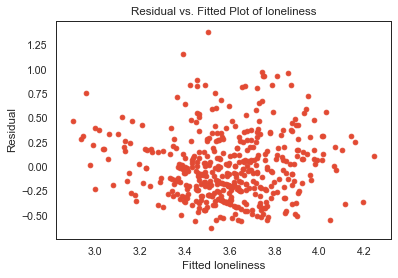

In [39]:
plt.scatter(model_out_pre.fittedvalues, model_out_pre.resid)

plt.xlabel('Fitted loneliness')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of loneliness')
plt.show()

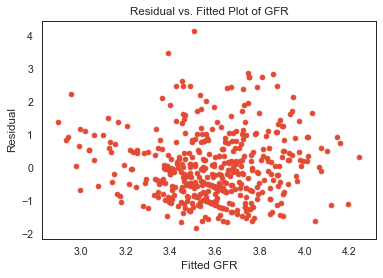

In [40]:
student_resid3 = sm.regression.linear_model.OLSResults.outlier_test(model_out_pre)
plt.scatter(model_out_pre.fittedvalues, student_resid3.student_resid)
plt.xlabel('Fitted GFR')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of GFR')
plt.show()